### 1  Feedforward: Building a ReLu 2 Layer neural network

#### Draw neural network with matplotlib, refer to https://gist.github.com/craffel/2d727968c3aaebd10359

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

#### Plot (draw) a network with:
  * 2 inputs,
  * 2 hidden layers (where the first layer contains 3 hidden units and thesecond contains 2 hidden units) and a
  * 3-class output (use a softmax function)

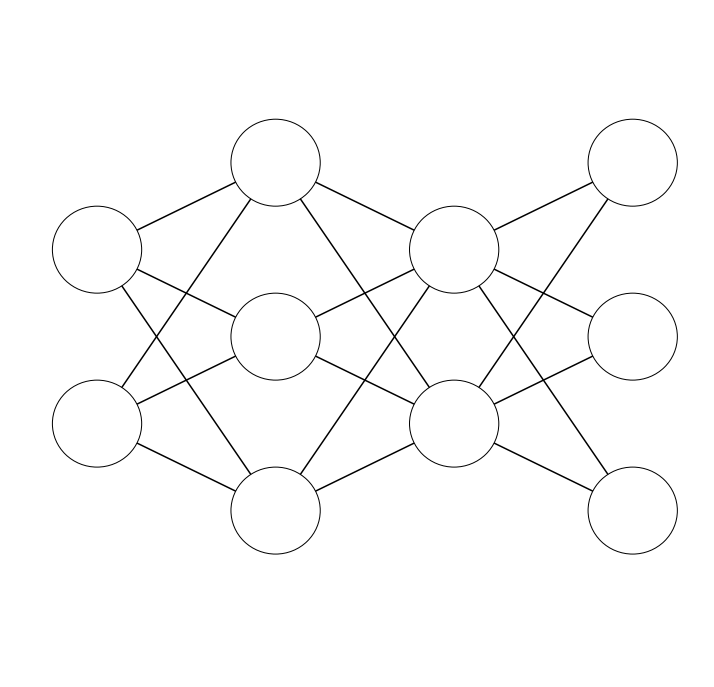

In [3]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [2, 3, 2, 3])

#### 2  Write out the mathematical equation for this network

  * Let $X$ denote the input of this neural network.
  * Let $W^{(1)}$ denote the weight between input and the first hidden layer and $b^{(1)}$ denote bias weight.
  * Let $W^{(2)}$ denote the weight between the first and the second hidden layer and $b_{(2)}$ denote bias weight.
  * Let $V$ denote the weight between the seconed hidden layer and the output layer and $c$ denote bias weight.
  * Let $h^{(1)}$ denote the value of the first hidden layer.
  * Let $h^{(2)}$ denote the value of the second hidden layer.
  * Let $y$ denote the output.

then we have

$h^{(1)} = relu(W^{(1)} \cdot X + b^{(1)})$

$h^{(2)} = relu(W^{(2)} \cdot h^{(1)} + b^{(2)})$

$y = softmax(V \cdot h^{(2)} + c)$


#### 3 Write out the function in python, call it ff_nn_2_ReLu(...)

In [98]:
import numpy as np
def relu(z):
    s = np.fmax(0, z)
    return s

def softmax(z):
    z = np.exp(z)
    #print(z)
    s = z / np.sum(z, axis = 0, keepdims=True)
    return s

def ff_nn_2_ReLu(x, w1, b1, w2, b2, v, c):
    a1 = np.dot(w1, x) + b1
    #print("h1:{}".format(h1))
    h1 = relu(a1)
    #print("a1:{}".format(a1))
    a2 = np.dot(w2, h1) + b2
    #print("h2:{}".format(h2))
    h2 = relu(a2)
    #print("a2:{}".format(a2))
    y = np.dot(v, h2) + c
    #print("y before:{}".format(y))
    y = softmax(y)
    #print("y:{}".format(y))
    return y

#### 4 What are the class probabilities associated with the forward pass of eachsample?

In [99]:
x = np.array([[1, 0, 0], [-1, -1, 1]])
#x = np.array([[1], [-1]])
w1 = np.array([[1, 0], [-1, 0], [0, 0.5]])
b1 = np.array([[0], [0], [1]])
w2 = np.array([[1, 0, 0], [-1, -1, 0]])
b2 = np.array([[1], [-1]])
v = np.array([[1, 1], [0, 0], [-1, -1]])
c = np.array([[1], [0], [0]])

y = ff_nn_2_ReLu(x, w1, b1, w2, b2, v, c)
print(y.T)

[[0.94649912 0.04712342 0.00637746]
 [0.84379473 0.1141952  0.04201007]
 [0.84379473 0.1141952  0.04201007]]


###  2 Gradient Descent

#### 1.  What are the partial derivatives of f with respect to x and to y?
$\frac{df(x,y)}{dx} = 2 * (1 - x) * -1 + 100 * 2 * (y - x^2) * -2x 
= 400x^3 - 400xy + 2x - 2$

$\frac{df(x,y)}{dy} = 100 * 2 * (y - x^2) * 1 = 200y - 200x^2$

#### 2.Create a visualization of the contours of the Rosenbrock function.

In [6]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random

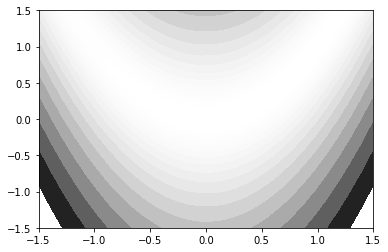

In [7]:
X, Y = np.meshgrid(np.linspace(-1.5, 1.5, 30), np.linspace(-1.5, 1.5, 30))
Z = (1 - X)**2 +  100 * (Y - X**2)**2
fig, ax = plt.subplots()
CS = ax.contourf(X, Y, Z, np.logspace(-1, 3, 30), cmap='gray_r')

#### 3. Write a Gradient Descent algorithm for finding the minimum of the func-tion.  Visualize your results with a few different learning rates.

In [8]:
def grad_f(vector):
    x, y = vector
    df_dx = 400 * x**3 - 400 * x * y + 2 * x - 2 
    df_dy = 200 * y - 200 * x**2
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=0.001):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1.,1.,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

In [9]:
def run_grad(iterations=10, learning_rate=0.001):
    np.random.seed(10)
    traj = grad_descent(iterations=iterations, learning_rate=learning_rate)

    fig, ax = plt.subplots()
    CS = ax.contourf(X, Y, Z, np.logspace(-1, 3, 31), cmap='gray_r')
    x = traj[:,0]
    y = traj[:,1]
    line = plt.plot(x,y,'-o')

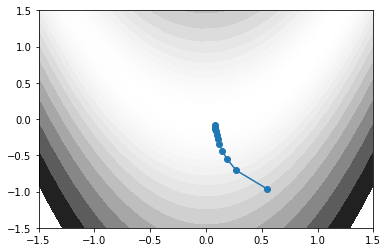

In [10]:
run_grad(iterations=10, learning_rate=0.001)

learning rate: 0.0005

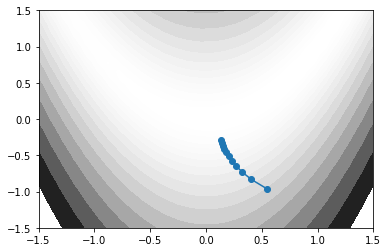

In [11]:
run_grad(iterations=10, learning_rate=0.0005)

learning rate: 0.002

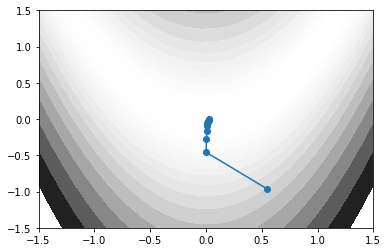

In [12]:
run_grad(iterations=10, learning_rate=0.002)

learning rate: 0.003

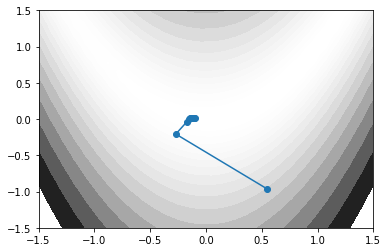

In [13]:
run_grad(iterations=10, learning_rate=0.003)

learning rate: 0.005

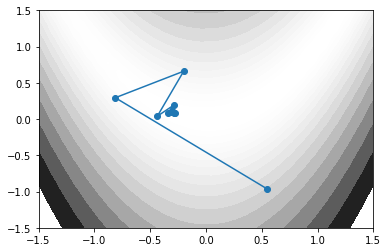

In [14]:
run_grad(iterations=10, learning_rate=0.005)

#### 4. Write a Gradient Descent With Momentum algorithm for finding the mini-mum. Visualize your results with a few different settings of the algorithmâ€™s hyper parameters.

In [15]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=0.001):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

def run_grad_descent_with_momentum(iterations, alpha, epsilon):
    np.random.seed(10)
    traj = grad_descent_with_momentum(iterations=iterations, alpha=alpha, epsilon=epsilon)
    
    fig, ax = plt.subplots()
    CS = ax.contourf(X, Y, Z, np.logspace(-1, 3, 31), cmap='gray_r')
    x = traj[:,0]
    y = traj[:,1]
    line = plt.plot(x,y,'-o')

alpha = 0.5, epsilon = 0.0005

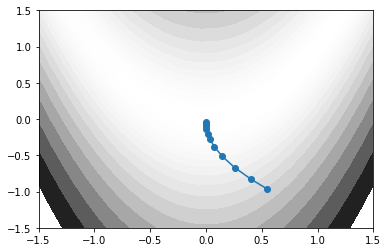

In [16]:
run_grad_descent_with_momentum(iterations=10, alpha=.5, epsilon=0.0005)

alpha = 0.9, epsilon = 0.0005

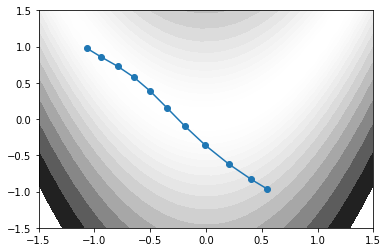

In [17]:
run_grad_descent_with_momentum(iterations=10, alpha=.9, epsilon=0.0005)

alpha = 0.5, epsilon = 0.001

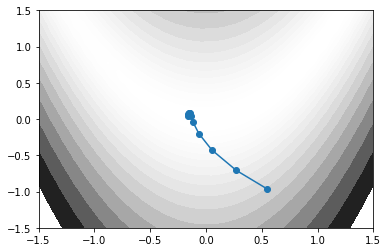

In [18]:
run_grad_descent_with_momentum(iterations=10, alpha=.5, epsilon=0.001)

alpha = 0.2, epsilon = 0.0005

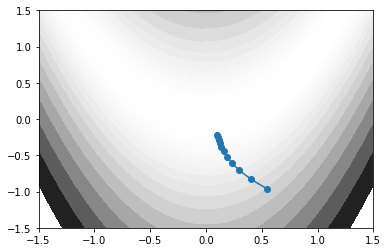

In [19]:
run_grad_descent_with_momentum(iterations=10, alpha=.2, epsilon=0.0005)

### 3  Backprop

#### 1. For the same network as in Number 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

Suppose we use cross-entrophy as the cost function

$$\frac{\partial L}{\partial c_m} = t_m - y_m$$

$$\frac{\partial L}{\partial V_{ml}} = (t_m - y_m) \cdot h^{(2)}_l$$

$$\frac{\partial L}{\partial W^{(2)}_{lk}} = \sum_M(t_m - y_m) \cdot V_{ml} \cdot 1(h^{(2)}_l > 0) \cdot h^{(1)}_k$$

$$\frac{\partial L}{\partial b^{(2)}_{l}} = \sum_M(t_m - y_m) \cdot V_{ml} \cdot 1(h^{(2)}_l > 0)$$

$$\frac{\partial L}{\partial W^{(1)}_{kj}} = \sum_M\sum_L(t_m - y_m) \cdot V_{ml} \cdot 1(h^{(2)}_l > 0) \cdot W^{(2)}_{lk} \cdot 1(h^{(1)}_k > 0) \cdot X_j$$

$$\frac{\partial L}{\partial b^{(1)}_{k}} = \sum_M\sum_L(t_m - y_m) \cdot V_{ml} \cdot 1(h^{(2)}_l > 0) \cdot W^{(2)}_{lk} \cdot 1(h^{(1)}_k > 0)$$

#### 2.  Write a function grad_f(...)that takes in a weights vector and returns the gradient of the Loss at that location.

In [81]:
def cost(T, Y):
    tot = T * np.log(Y)
    return -tot.sum()

In [85]:
def relu_grad(z):
    return (z > 0).astype(int)

def relu(z):
    s = np.fmax(0, z)
    return s

softmax = lambda x: np.exp(x)/(np.exp(x).sum(axis=1, keepdims=True))

def ff_nn_2_ReLu(x, w1, b1, w2, b2, v, c):
    a1 = x.dot(w1) + b1
    h1 = relu(a1)
    a2 = h1.dot(w2) + b2
    h2 = relu(a2)
    y = h2.dot(v) + c
    y = softmax(y)
    return h1, h2, y

def grad_f(weights, X, T):
    W1 = weights[:6].reshape(2,3)
    W2 = weights[6:12].reshape(3,2)
    V = weights[12:18].reshape(2,3)
    b1 = weights[18:21].reshape(1,3)
    b2 = weights[21:23].reshape(1,2)
    c = weights[23:26].reshape(1,3)
    
    H1, H2, Y = ff_nn_2_ReLu(X, W1, b1, W2, b2, V, c)
    grad_c = (T - Y).sum(axis=0)
    grad_v = H2.T.dot(T - Y)
    grad_w2 = H1.T.dot((T - Y).dot(V.T) * relu_grad(H2))
    grad_b2 = ((T - Y).dot(V.T) * relu_grad(H2)).sum(axis=0)
    grad_w1 = X.T.dot(((T - Y).dot(V.T) * relu_grad(H2)).dot(W2.T) * relu_grad(H1))
    grad_b1 = (((T - Y).dot(V.T) * relu_grad(H2)).dot(W2.T) * relu_grad(H1)).sum(axis=0)
    
    grad = np.array(list(grad_w1.reshape(6,)) + list(grad_w2.reshape(6,)) + list(grad_v.reshape(6,)) +
                    list(grad_b1.reshape(3,)) + list(grad_b2.reshape(2,)) + list(grad_c.reshape(3,)))
    
    return grad, cost(T, Y)


#### 3. plot your sample dataset, coloring data points by their respective class.

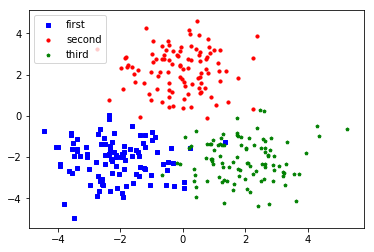

In [86]:
N = 100
n_clusters = 3
dim = 2
np.random.seed(122)
# Setting up 3 clusters with centers at [-2,-2],[0,2],[2,-2]
data = np.random.multivariate_normal(mean=[0, 0], cov = [[1, 0], [0, 1]], size=N * n_clusters * dim).reshape(2 * N * n_clusters, dim)
c1_center, c2_center, c3_center = [[-2,-2],[0,2],[2,-2]]
c1, c2, c3 = data[0:N,:] + c1_center, data[N:(2*N),:] + c2_center, data[(2*N):(3*N),:] + c3_center

data = np.vstack((c1,c2,c3))
# Classes of the three clusters
classes = np.array([0]*N + [1]*N + [2]*N)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(c1[:,0],c1[:,1], s=10, c='b', marker="s", label='first')
ax1.scatter(c2[:,0],c2[:,1], s=10, c='r', marker="o", label='second')
ax1.scatter(c3[:,0],c3[:,1], s=10, c='g', marker="p", label='third')
plt.legend(loc='upper left');
#plt.show()
T = np.zeros((N * n_clusters, n_clusters))
for n in range(N * n_clusters):
    T[n, classes[n]] = 1

#### 4.  Fit your network using Gradient Descent.  Keep track of the total Loss at each iteration and plot the result.

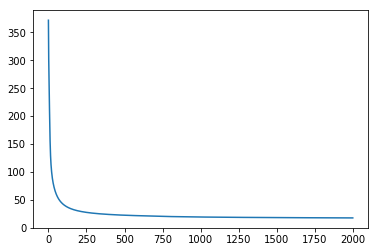

In [91]:
np.random.seed(123)

# Intilaizing weights
weights = np.random.uniform(-1,1,size=26).astype("float")
# Setting up constants
learning_rate = 0.0005
costs = []
# Running neural network
for epoch in range(2000):
    grad, c = grad_f(weights, data, T)
    costs.append(c)
    weights += learning_rate * grad
p = plt.plot(costs)

#### 5.  Repeat the exercise above using Momentum.  Comment on whether your algorithm seems to converge more efficiently.

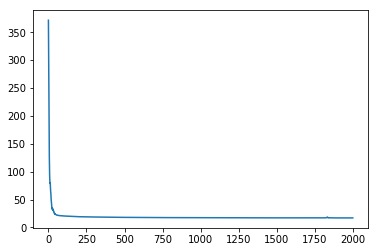

In [96]:
np.random.seed(123)

# Intilaizing weights
weights = np.random.uniform(-1,1,size=26).astype("float")
# Setting up constants
alpha=.9
epsilon=0.0005
v = np.zeros(26)
costs = []
# Running neural network
for epoch in range(2000):
    grad, c = grad_f(weights, data, T)
    costs.append(c)
    grad = -grad
    v = alpha * v + epsilon * grad
    weights -= v
p = plt.plot(costs)

With the above setting, we can see that Gradient Descent with Momentum converges more efficiently than Gradient Descent.